# Training procedure for (see details in ../training/training.ipynb)

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import ipyparallel as ipp

In [3]:
cluster = ipp.Cluster(engines='mpi', n=8)

In [4]:
rc = cluster.start_and_connect_sync()

Starting 8 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>


  0%|          | 0/8 [00:00<?, ?engine/s]

In [6]:
dv = rc[:]

In [11]:
import matplotlib.pyplot as plt
from fast.utils.img_loader import load_image_list_renormalize
from pathlib import Path

In [65]:
%%px --local
from fast.core import training
from pathlib import Path
import fast.input_params as inp
import matplotlib.pyplot as plt

In [19]:
%%px
%load_ext autoreload
%autoreload 2
from mpi4py import MPI


comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()


[stdout:4] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[stdout:7] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[stdout:2] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[stdout:0] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[stdout:6] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[stdout:1] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[stdout:3] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[stdout:5] The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%%px
base_path = Path('selected_images/')
image_files_all = list(base_path.glob('*.tiff'))

In [12]:
images_all = load_image_list_renormalize(image_files_all, img_format='tiff')

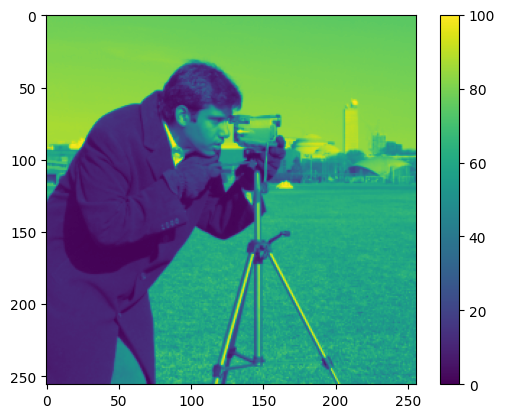

In [15]:
plt.imshow(images_all[-1])
plt.colorbar()

In [29]:
dv.scatter('images', images_all)
dv.scatter('images_name', image_files_all)

<AsyncResult(scatter): pending>

In [45]:
%%px
out_dir = Path('trained_models')/images_name[0].stem

### Generating and saving the training database.
Test c=2 only for now

In [49]:
%%px 
train_params = inp.TrainingInputParams(
                                   num_repeats_per_mask=1,
                                   measurements_per_initial_mask=10,
                                   test_c_values=[2], 
                                   verbose_training=False)

In [50]:
%%px
train_data_all = training.generate_training_databases(train_params=train_params, image_arrays=images, output_dir=out_dir)

[output:3]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:0]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:7]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:3]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:0]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:7]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:6]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:2]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:3]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:0]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:7]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:3]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:0]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:6]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:7]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:5]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:2]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:6]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:2]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:6]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:2]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

%px:   0%|          | 0/8 [00:00<?, ?tasks/s]

In [52]:
training_databases_all = dv.gather('train_data_all', flat)

In [58]:
training_databases_all = dv['train_data_all']

### Example of training data:
1. measurement mask, 
2. the image reconstructed by interpolating the measured points, 
3. and the RDs for the unmeasured points.



Out[1:23]: <matplotlib.colorbar.Colorbar at 0x7fbc6e8da4a0>

Out[7:23]: <matplotlib.colorbar.Colorbar at 0x7fe17f6224d0>

Out[4:23]: <matplotlib.colorbar.Colorbar at 0x7fd259c524a0>

Out[3:23]: <matplotlib.colorbar.Colorbar at 0x7f6e172524a0>

Out[6:23]: <matplotlib.colorbar.Colorbar at 0x7f9f5c2124d0>

Out[2:23]: <matplotlib.colorbar.Colorbar at 0x7f569129a4a0>

Out[5:23]: <matplotlib.colorbar.Colorbar at 0x7f7d91c464a0>

Out[0:23]: <matplotlib.colorbar.Colorbar at 0x7f72111ba4a0>

[output:5]

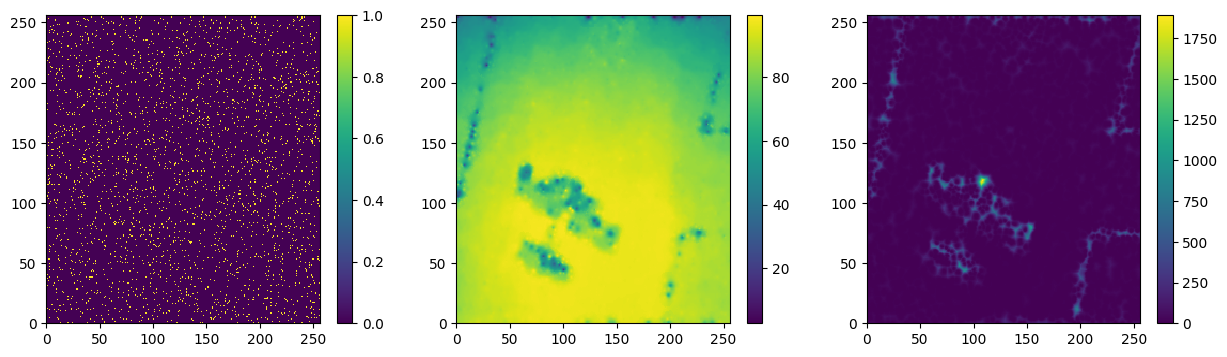

[output:2]

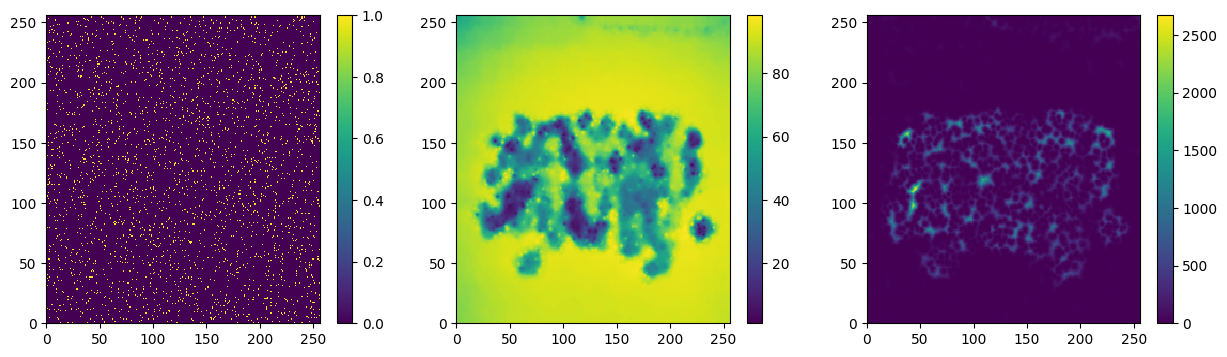

[output:1]

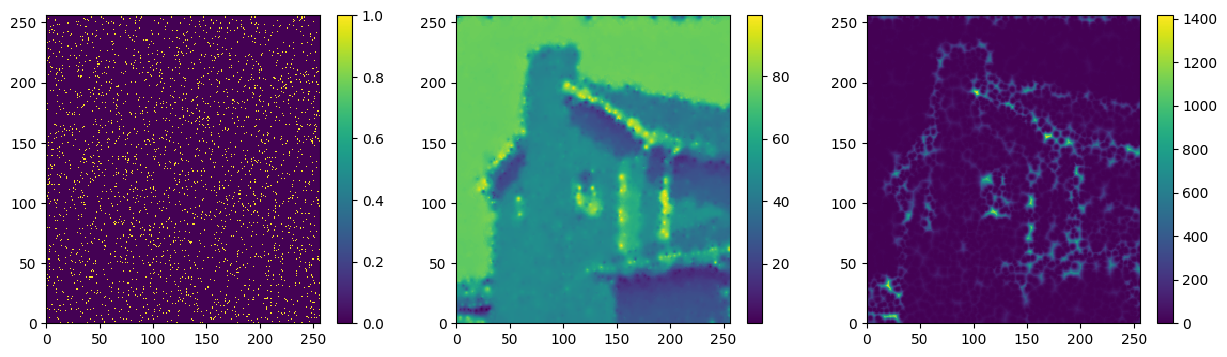

[output:7]

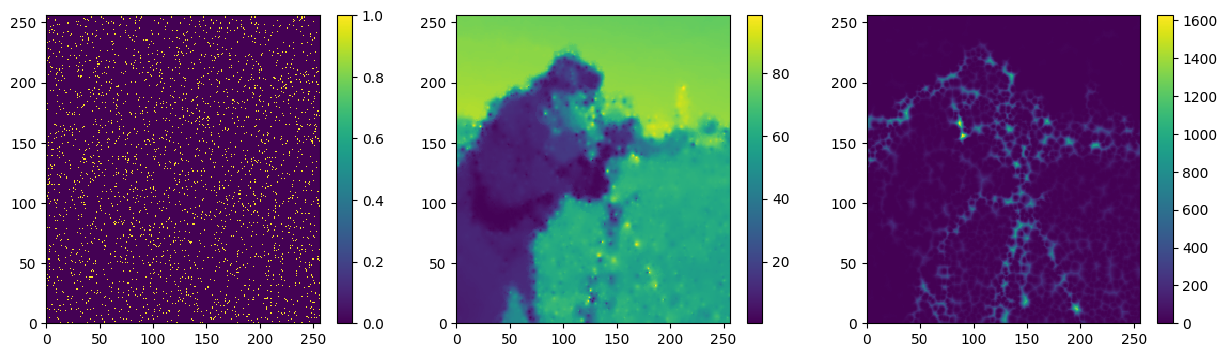

[output:6]

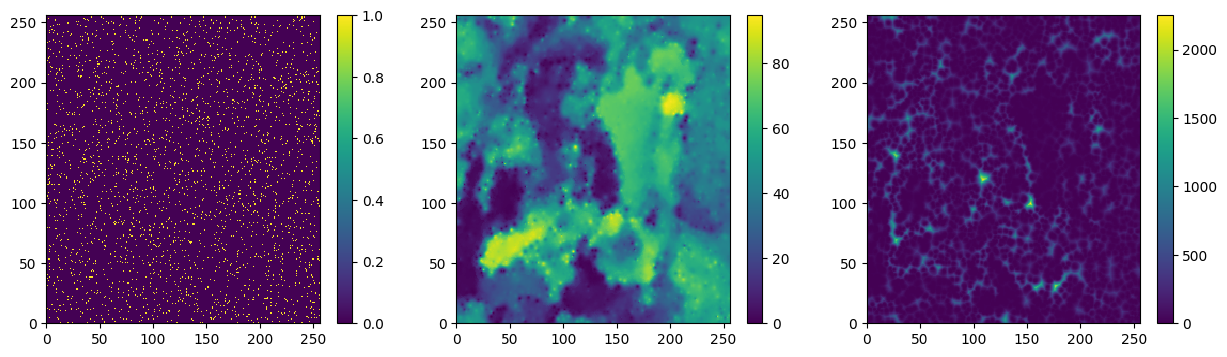

[output:4]

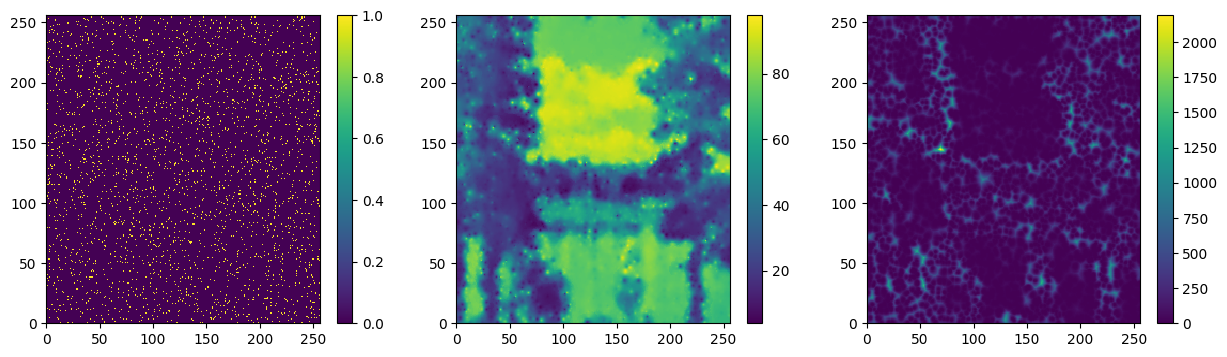

[output:0]

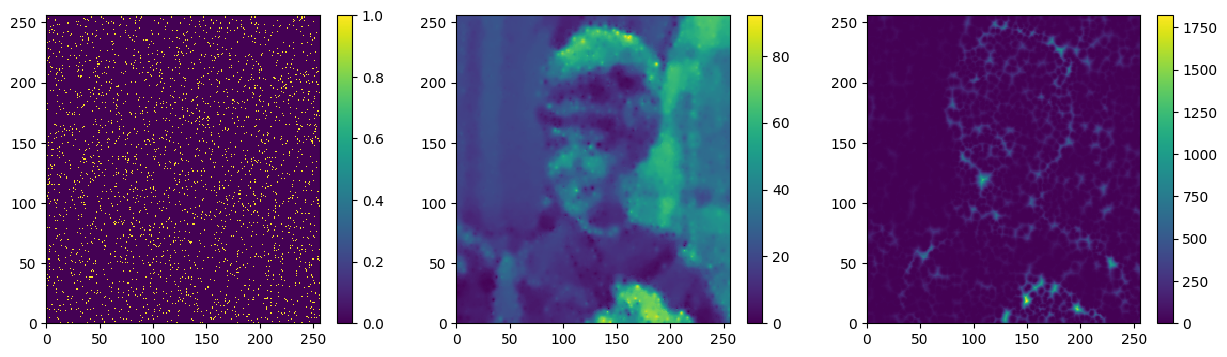

[output:3]

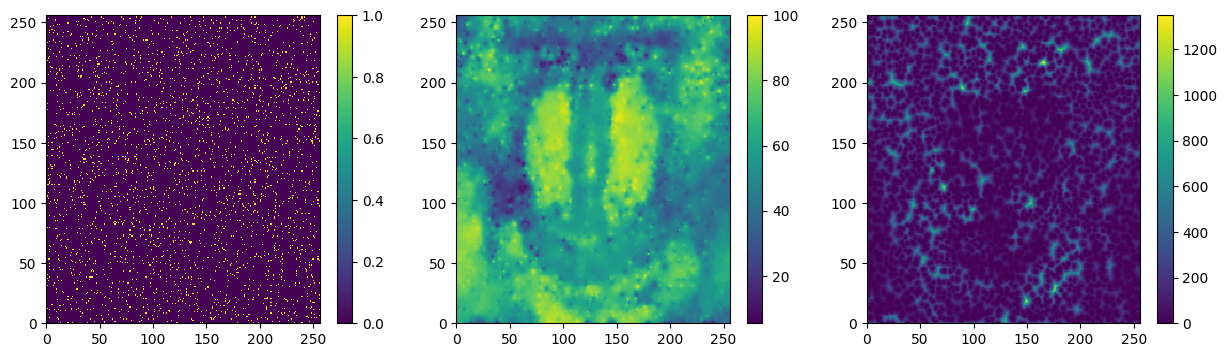

In [67]:
%%px
fig, axs = plt.subplots(1,3, figsize=[15, 4])
plt.subplot(1,3,1)
plt.pcolormesh(train_data_all[0].outputs.masks[0][::-1])
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(train_data_all[0].outputs.recons[0][::-1])
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(train_data_all[0].outputs.erds[0][::-1])
plt.colorbar()

### Generating the NN model and identifying the optimal value of $c$.

For each value of $c$:
1. Load the training database and split it into (training, validation) sets. 
2. Use the training set to train a multi-layer perceptron model (using sklearn).
3. Using this model, calculate the $R_{squared}$ for the fit of the validation set.

When we choose the value of $c$ with the highest $R_{squared}$, we get $c=2$.

In [34]:
output_path = base_path

In [35]:
val_scores = {}
for c_value in tqdm(train_params.test_c_values):

    print('test c', c_value)

    features_erds_db_path = output_path / Path(f'c_{c_value}') / 'training_database.pkl'

    val_scores[c_value] = []

    save_path = features_erds_db_path.parent / f'erd_model_relu.pkl'
    
    features_all, erds_all = training.get_features_and_erds_from_db(features_erds_db_path)
    train_feat, train_erds, val_feat, val_erds = training.training_validation_split(features_all, erds_all, training_split=0.8,random_seed=111)
    
    erd_model, _ = training.fit_erd_model((train_feat, train_erds),
                                          model_params=inp.SladsModelParams(max_iter=50),
                                          save_path=save_path,
                                          training_split=0.8, 
                                          random_seed = 111)
    score = training.validate_erd_model_r_squared((val_feat, val_erds),
                                                  erd_model_path=save_path,
                                                  random_seed = 111)
    print('R squared score', score)
    val_scores[c_value].append(score)
        
    


  0%|          | 0/1 [00:00<?, ?it/s]

test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.


/Users/skandel/.conda/envs/slads/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8140642284583541
R squared score 0.8140642284583541


In [36]:
val_scores

{2: [0.8140642284583541]}